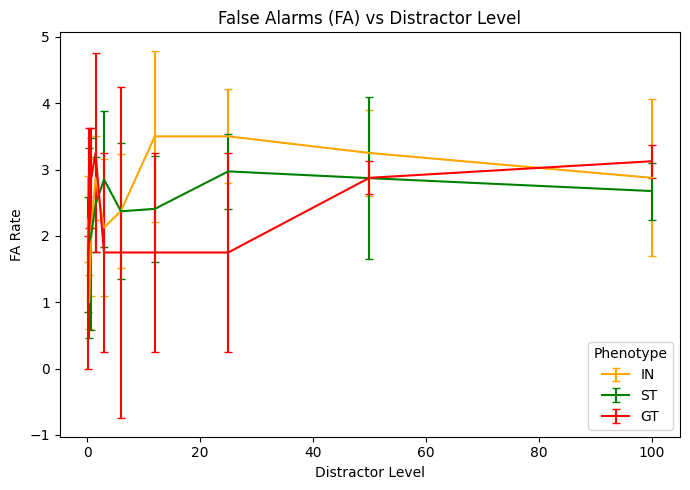

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file and the 'Tidy_CRFA' sheet
file_path = 'Sat9surrond.xlsx'
xls = pd.ExcelFile(file_path)
tidy_crfa_df = pd.read_excel(xls, sheet_name='Tidy_CRFA')

# Prepare a dictionary to map phenotypes to colors
colors = {'ST': 'green', 'IN': 'orange', 'GT': 'red'}

# Group by distractor level and phenotype to calculate mean and standard deviation for FA (False Alarms)
grouped_fa_data = tidy_crfa_df.groupby(['Distractor_level', 'phenotype']).agg({
    'FA': ['mean', 'std']
}).reset_index()

# Prepare for plotting FA
plt.figure(figsize=(7, 5))

# Plot each phenotype line for FA
phenotypes = tidy_crfa_df['phenotype'].unique()
for phenotype in phenotypes:
    phenotype_data = grouped_fa_data[grouped_fa_data['phenotype'] == phenotype]
    plt.errorbar(phenotype_data['Distractor_level'], 
                 phenotype_data['FA']['mean'], 
                 yerr=phenotype_data['FA']['std'], 
                 label=phenotype, 
                 color=colors[phenotype], 
                 capsize=3)

# Set axis labels and title
plt.xlabel('Distractor Level')
plt.ylabel('FA Rate')
plt.title('False Alarms (FA) vs Distractor Level')
plt.legend(title='Phenotype')

# Show the plot
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import pingouin as pg

# Load the Excel file and the 'Tidy_CRFA' sheet
file_path = 'Sat9surrond.xlsx'
xls = pd.ExcelFile(file_path)
tidy_crfa_df = pd.read_excel(xls, sheet_name='Tidy_CRFA')


# Clean the data and only keep relevant columns (phenotype, Animal_ID, Distractor_level, FA)
tidy_crfa_df_clean = tidy_crfa_df[['phenotype', 'Animal_ID', 'Distractor_level', 'FA']].dropna()

# Perform a mixed-design ANOVA for FA with Distractor Level as the within-subject factor
aov_fa = pg.mixed_anova(dv='FA', 
                        within='Distractor_level', 
                        between='phenotype', 
                        subject='Animal_ID', 
                        data=tidy_crfa_df_clean, 
                        effsize='n2')  # Generalized eta-squared effect size

# Run pairwise post-hoc comparisons with Bonferroni correction for Distractor Level
posthoc_fa = pg.pairwise_tests(dv='FA', 
                               within='Distractor_level', 
                               between='phenotype', 
                               subject='Animal_ID', 
                               data=tidy_crfa_df_clean, 
                               padjust='bonf')  # Bonferroni correction for post-hoc

# Round the results for better readability
aov_fa_rounded = aov_fa.round(4)
posthoc_fa_rounded = posthoc_fa.round(4)

# Print the ANOVA results for FA
print("ANOVA Results for FA (Distractor Level Only):")
print(aov_fa_rounded)

# Print the Post-hoc results for FA
print("\nPost-hoc Results for FA (Distractor Level Only):")
print(posthoc_fa_rounded)

# Optionally, you can export the results to CSV files for better viewing:
aov_fa_rounded.to_csv("anova_fa_results.csv", index=False)
posthoc_fa_rounded.to_csv("posthoc_fa_results.csv", index=False)

ANOVA Results for FA (Distractor Level Only):
             Source       SS  DF1  DF2      MS       F   p-unc  p-GG-corr  \
0         phenotype   1.6652    2   14  0.8326  0.1736  0.8424        NaN   
1  Distractor_level  27.1683    9  126  3.0187  4.2294  0.0001     0.0062   
2       Interaction  31.3374   18  126  1.7410  2.4392  0.0021        NaN   

       n2     eps sphericity  W-spher  p-spher  
0  0.0077     NaN        NaN      NaN      NaN  
1  0.1251  0.5389      False   0.0027   0.0036  
2  0.1442     NaN        NaN      NaN      NaN  

Post-hoc Results for FA (Distractor Level Only):
                        Contrast Distractor_level     A     B Paired  \
0               Distractor_level                -  0.16  0.36   True   
1               Distractor_level                -  0.16  0.75   True   
2               Distractor_level                -  0.16   1.5   True   
3               Distractor_level                -  0.16   3.0   True   
4               Distractor_level       